In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy.stats import pearsonr


# Set the default plots style
sns.set_theme(style="white")

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.bottom'] = True
mpl.rcParams['axes.spines.left'] = True

# Supplemental figure1
- More detailed Training precedure (?)
- histgram of the subject number for each age
    - Game1&Game2
- histgram of the dropout subject number for each age
- histgram of the mean training number for each age

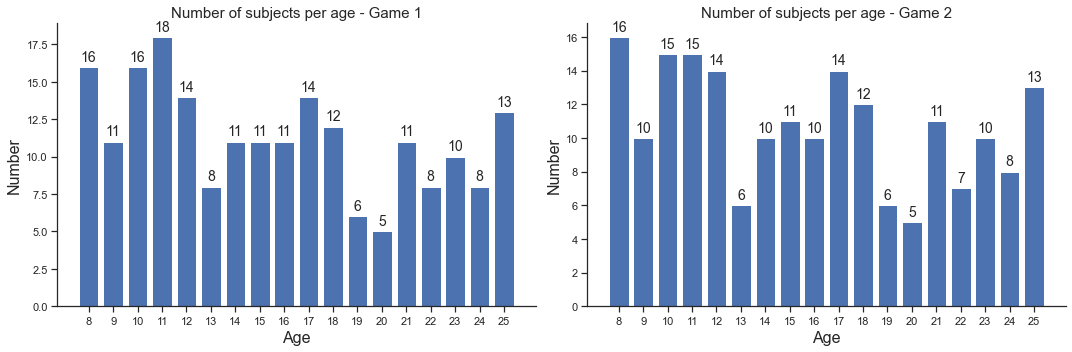

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

# Read data for game 1
participants_file = r'/mnt/workdir/DCM/BIDS/participants.tsv'
data_game1 = pd.read_csv(participants_file, sep='\t')
data_game1 = data_game1[data_game1['game1_fmri'] >= 0.5]

# Read data for game 2
data_game2 = pd.read_csv(participants_file, sep='\t')
data_game2 = data_game2[data_game2['game2_fmri'] >= 0.5]

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

# Plot for game 1
ages_game1 = []
nums_game1 = []
for subs in data_game1.groupby('Age'):
    ages_game1.append(subs[0])
    nums_game1.append(len(subs[1]))

rects_game1 = ax1.bar(ages_game1, nums_game1)
ax1.set_xlabel("Age", size=16)
ax1.set_ylabel("Number", size=16)
ax1.set_xticks(range(8, 26))
ax1.set_title("Number of subjects per age - Game 1", size=15)
ax1.bar_label(rects_game1, padding=3, size=14)

# Plot for game 2
ages_game2 = []
nums_game2 = []
for subs in data_game2.groupby('Age'):
    ages_game2.append(subs[0])
    nums_game2.append(len(subs[1]))

rects_game2 = ax2.bar(ages_game2, nums_game2)
ax2.set_xlabel("Age", size=16)
ax2.set_ylabel("Number", size=16)
ax2.set_xticks(range(8, 26))
ax2.set_title("Number of subjects per age - Game 2", size=15)
ax2.bar_label(rects_game2, padding=3, size=14)

fig.tight_layout()

# Add tick lines to the bottom and left spines
ax1.tick_params(axis='x', which='both', bottom=True, top=False, direction='out')
ax1.tick_params(axis='y', which='both', left=True, right=False, direction='out')

ax2.tick_params(axis='x', which='both', bottom=True, top=False, direction='out')
ax2.tick_params(axis='y', which='both', left=True, right=False, direction='out')

# Save the figure
savepath = r'/mnt/workdir/DCM/Result/paper/sf/sf1/Subjects_barplot.pdf'
plt.savefig(savepath, bbox_inches='tight', pad_inches=0, dpi=300)
plt.show()

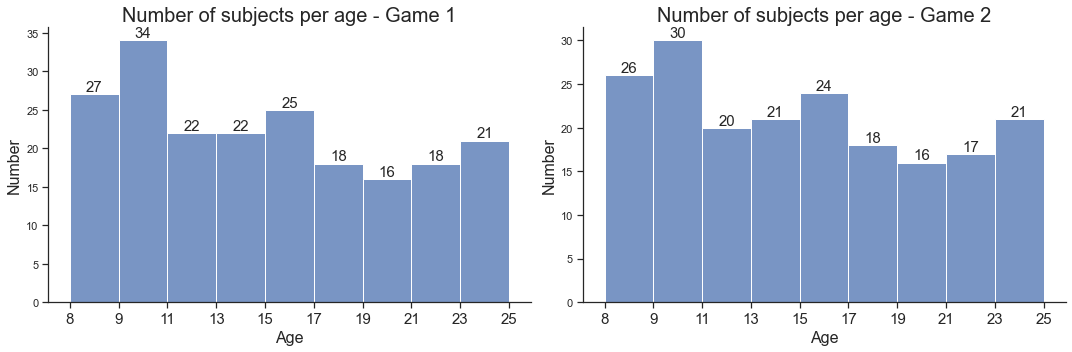

In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read data for game 1
participants_file = r'/mnt/workdir/DCM/BIDS/participants.tsv'
data_game1 = pd.read_csv(participants_file, sep='\t')
data_game1 = data_game1[data_game1['game1_fmri'] >= 0.5]

# Read data for game 2
data_game2 = pd.read_csv(participants_file, sep='\t')
data_game2 = data_game2[data_game2['game2_fmri'] >= 0.5]

# Create subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

# Plot for game 1
sns.set_palette('deep')
sns.histplot(data=data_game1, x='Age', ax=ax1)
ax1.set_xlabel("Age", size=16)
ax1.set_ylabel("Number", size=16)
ax1.set_title("Number of subjects per age - Game 1", size=20)

# Adjust x-axis ticks for game 1
bar_boundaries_game1 = [p.get_x() for p in ax1.patches] + [ax1.patches[-1].get_x() + ax1.patches[-1].get_width()]
ax1.set_xticks(bar_boundaries_game1)
ax1.set_xticklabels(map(int, bar_boundaries_game1),size=15)

# Add subject count labels for game 1
for patch in ax1.patches:
    height = patch.get_height()
    ax1.annotate(f"{height}", (patch.get_x() + patch.get_width() / 2, height),
                 ha='center', va='bottom', fontsize=15)

# Plot for game 2
sns.set_palette('deep')
sns.histplot(data=data_game2, x='Age', ax=ax2)
ax2.set_xlabel("Age", size=16)
ax2.set_ylabel("Number", size=16)
ax2.set_title("Number of subjects per age - Game 2", size=20)

# Adjust x-axis ticks for game 2
bar_boundaries_game2 = [p.get_x() for p in ax2.patches] + [ax2.patches[-1].get_x() + ax2.patches[-1].get_width()]
ax2.set_xticks(bar_boundaries_game2)
ax2.set_xticklabels(map(int, bar_boundaries_game2),size=15)

# Add subject count labels for game 2
for patch in ax2.patches:
    height = patch.get_height()
    ax2.annotate(f"{height}", (patch.get_x() + patch.get_width() / 2, height),
                 ha='center', va='bottom', fontsize=15)

fig.tight_layout()

# Add tick lines to the bottom and left spines
ax1.tick_params(axis='x', which='both', bottom=True, top=False, direction='out')
ax1.tick_params(axis='y', which='both', left=True, right=False, direction='out')

ax2.tick_params(axis='x', which='both', bottom=True, top=False, direction='out')
ax2.tick_params(axis='y', which='both', left=True, right=False, direction='out')

# Save the figure
savepath = r'/mnt/workdir/DCM/Result/paper/sf/sf1/Subjects_histgram.pdf'
plt.savefig(savepath, bbox_inches='tight', pad_inches=0, dpi=300,transparent=True)
plt.show()

### Dropout subjects

The number of dropout subjects : 267


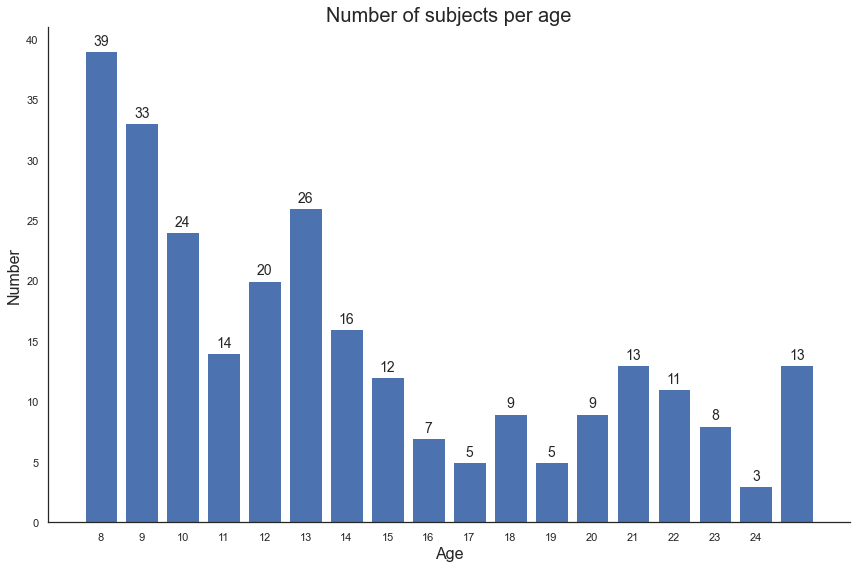

In [69]:
dropout_file = pd.read_excel(r"/mnt/workdir/DCM/Result/analysis/Online_training/participants_drop_out.xlsx")
print("The number of dropout subjects :", len(dropout_file))

# extract subject's number in each group
ages = []
nums = []
for subs in dropout_file.groupby('Age'):
    ages.append(subs[0])
    nums.append(len(subs[1]))

# plot bar chart of subject's number with labels
fig,ax = plt.subplots(figsize=(12,8))
rects = ax.bar(ages,nums,color='b')

# add some text for labels, title and custom x-axis tick labels, etc
ax.set_xlabel("Age",size=16)
ax.set_ylabel("Number",size=16)
ax.set_xticks(range(8,25))
ax.set_title("Number of subjects per age",size=20)
ax.bar_label(rects,padding=3,size=14)

fig.tight_layout()
#savepath = r'/mnt/workdir/DCM/result/behaviour/dropout_subjects.pdf'
#plt.savefig(savepath,bbox_inches='tight',pad_inches=0,dpi=300)
plt.show()

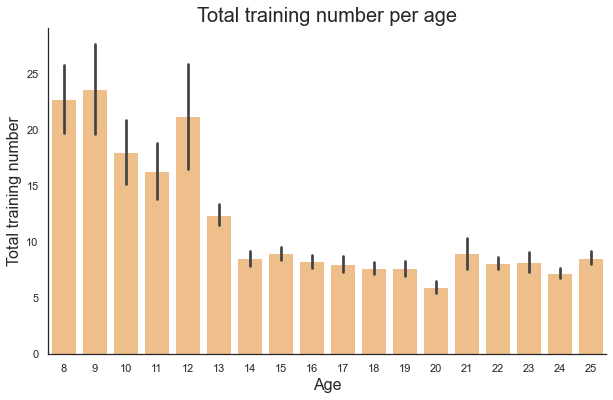

In [71]:
training_file = pd.read_excel(r'/mnt/workdir/DCM/Result/analysis/Online_training/Valid information_203.xlsx')
# plot bar plot with error bar using seaborn the total number of training with ages from training file's Total_Counts and Age column

fig, ax = plt.subplots(figsize=(10,6))
sns.barplot(x='Age',y='Total_Counts',data=training_file,ax=ax,errorbar='se',color='#ffbe7a')
ax.set_xlabel("Age",size=16)
ax.set_ylabel("Total training number",size=16)
ax.set_title("Total training number per age",size=20)
#ax.set_xticks(range(8,25))
#ax.set_ylim(0,100)
#savepath = r'/mnt/workdir/DCM/result/behaviour/age-training-num.png'
#plt.savefig(savepath,bbox_inches='tight',pad_inches=0,dpi=300)
plt.show()

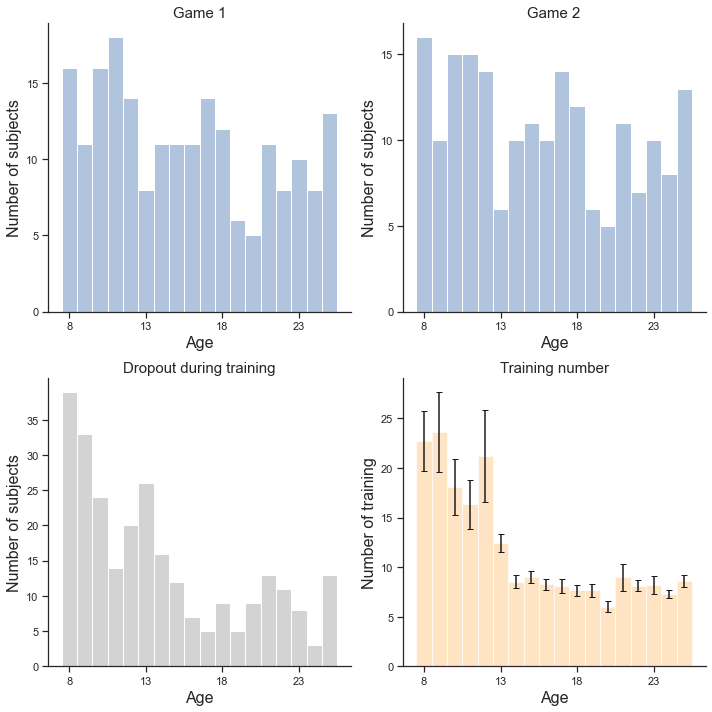

In [188]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read data for game 1
participants_file = r'/mnt/workdir/DCM/BIDS/participants.tsv'
data_game1 = pd.read_csv(participants_file, sep='\t')
data_game1 = data_game1[data_game1['game1_fmri'] >= 0.5]

# Read data for game 2
data_game2 = pd.read_csv(participants_file, sep='\t')
data_game2 = data_game2[data_game2['game2_fmri'] >= 0.5]

# Read dropout data
dropout_file = pd.read_excel(r"/mnt/workdir/DCM/Result/analysis/Online_training/participants_drop_out.xlsx")

# Read training data
training_file = pd.read_excel(r'/mnt/workdir/DCM/Result/analysis/Online_training/Valid information_203.xlsx')

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(10,10))
bar_width = 1
# Plot for game 1
ages_game1 = [group[0] for group in data_game1.groupby('Age')]
nums_game1 = [len(group[1]) for group in data_game1.groupby('Age')]

rects1 = axs[0, 0].bar(ages_game1, nums_game1,width=bar_width,color='lightsteelblue')
axs[0, 0].set_xlabel("Age", size=16)
axs[0, 0].set_ylabel("Number of subjects", size=16)
axs[0, 0].set_xticks(np.arange(min(ages_game1), max(ages_game1)+1, 5))  # Set x-ticks to appear every 5 years
axs[0, 0].set_yticks(np.arange(0, max(nums_game1)+1, 5))  # Set y-ticks to appear every 5 units
axs[0, 0].set_title("Game 1", size=15)
#axs[0, 0].bar_label(rects1, padding=3, size=14)

# Plot for game 2
ages_game2 = [group[0] for group in data_game2.groupby('Age')]
nums_game2 = [len(group[1]) for group in data_game2.groupby('Age')]

rects2 = axs[0, 1].bar(ages_game2, nums_game2,width=bar_width,color='lightsteelblue')
axs[0, 1].set_xlabel("Age", size=16)
axs[0, 1].set_ylabel("Number of subjects", size=16)
axs[0, 1].set_xticks(np.arange(min(ages_game2), max(ages_game2)+1, 5))  # Set x-ticks to appear every 5 years
axs[0, 1].set_yticks(np.arange(0, max(nums_game1)+1, 5))  # # Set y-ticks to be same as game 1
axs[0, 1].set_title("Game 2", size=15)
#axs[0, 1].bar_label(rects2, padding=3, size=14)

# Plot for dropout
ages_dropout = [group[0] for group in dropout_file.groupby('Age')]
nums_dropout = [len(group[1]) for group in dropout_file.groupby('Age')]

rects3 = axs[1, 0].bar(ages_dropout, nums_dropout,width=bar_width, color='lightgrey')
axs[1, 0].set_xlabel("Age", size=16)
axs[1, 0].set_ylabel("Number of subjects", size=16)
axs[1, 0].set_xticks(np.arange(min(ages_dropout), max(ages_dropout)+1, 5))
axs[1, 0].set_yticks(np.arange(0, max(nums_dropout), 5))
axs[1, 0].set_title("Dropout during training", size=15)
#axs[1, 0].bar_label(rects3, padding=3, size=14)

# Calculate the mean and se of total_counts for each age
mean_counts = training_file.groupby('Age')['Total_Counts'].mean()
se_counts = training_file.groupby('Age')['Total_Counts'].sem()

# Define the x positions for the bars
ages = mean_counts.index

# Plot the bar plot with error bars
axs[1, 1].bar(ages, mean_counts, yerr=se_counts, capsize=3,width=bar_width,linewidth=0.6, color='bisque')

# Set the x-axis limits, ticks, and labels
axs[1, 1].set_xticks([8,13,18,23])
axs[1, 1].set_xticklabels([8,13,18,23])

# Set the labels and title
axs[1, 1].set_xlabel("Age", size=16)
axs[1, 1].set_ylabel("Number of training", size=16)
axs[1, 1].set_title("Training number", size=15)

# Add tick lines to the bottom and left spines for all subplots
for ax in axs.flat:
    #ax.set_xticks(np.arange(min(training_file['Age']), max(training_file['Age'])+1, 5))
    ax.tick_params(axis='x', which='both', bottom=True, top=False, direction='out')
    ax.tick_params(axis='y', which='both', left=True, right=False, direction='out')

fig.tight_layout()

# Save the figure
savepath = r'/mnt/workdir/DCM/Result/paper/sf/sf1/subjects_barplot.pdf'
plt.savefig(savepath, bbox_inches='tight', pad_inches=0, dpi=300)
plt.show()